# Прогнозирование ухода клиентов банка

У банка начался отток клиентов, нужно предложить решение проблемы.
В моем распоряжении данные со следующими признаками: ID и фамилия клиента, кредитный рейтинг, страна проживания, пол, возраст, "стаж" как клиента, баланс на счете, количество используемых продуктов и др. Маркетологи считают, что сохранять текущих клиентов дешевле, чем привлекать новых.

## Задачи проекта:
Решить задачу классификции для прогнозирования оттока клиента на основе исторических данных. Качество модели оценивается метрикой F1-мера (среднее гармоническое), значение на тестовой выборке должно быть не менее 0.59.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Проведем-построение-ROC-кривой-для-кажддой-модели.-И-выведем-показатель-AUC-ROC." data-toc-modified-id="Проведем-построение-ROC-кривой-для-кажддой-модели.-И-выведем-показатель-AUC-ROC.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проведем построение ROC-кривой для кажддой модели. И выведем показатель AUC-ROC.</a></span></li><li><span><a href="#Вывод-по-несбалансированным-моделям:" data-toc-modified-id="Вывод-по-несбалансированным-моделям:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод по несбалансированным моделям:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Проверка-адекватности-модели" data-toc-modified-id="Проверка-адекватности-модели-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка адекватности модели</a></span></li><li><span><a href="#1-способ-борьбы-с-дисбалансом:-Взвешивание-классов" data-toc-modified-id="1-способ-борьбы-с-дисбалансом:-Взвешивание-классов-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>1 способ борьбы с дисбалансом: Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Модель-логистической-регресии" data-toc-modified-id="Модель-логистической-регресии-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Модель <code>логистической регресии</code></a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Модель <code>случайный лес</code></a></span></li><li><span><a href="#Модель-решающее-дерево" data-toc-modified-id="Модель-решающее-дерево-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Модель <code>решающее дерево</code></a></span></li></ul></li><li><span><a href="#Вывод-после-взвешивания-классов" data-toc-modified-id="Вывод-после-взвешивания-классов-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Вывод после взвешивания классов</a></span></li><li><span><a href="#2-способ:-Увеличение-выборки-(увеличения-класса-1---&quot;положительных&quot;-ответов)" data-toc-modified-id="2-способ:-Увеличение-выборки-(увеличения-класса-1---&quot;положительных&quot;-ответов)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>2 способ: Увеличение выборки (увеличения класса 1 - "положительных" ответов)</a></span><ul class="toc-item"><li><span><a href="#Модель-логистической-регресии" data-toc-modified-id="Модель-логистической-регресии-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Модель <code>логистической регресии</code></a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Модель <code>случайный лес</code></a></span></li><li><span><a href="#Модель-решающее-дерево" data-toc-modified-id="Модель-решающее-дерево-6.4.3"><span class="toc-item-num">6.4.3&nbsp;&nbsp;</span>Модель <code>решающее дерево</code></a></span></li></ul></li><li><span><a href="#Вывод-после-увеличения-выборки" data-toc-modified-id="Вывод-после-увеличения-выборки-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод после увеличения выборки</a></span></li><li><span><a href="#3-способ:--Уменьшение-выборки-(уменьшение-класса-0---&quot;отрицательных&quot;-ответов)" data-toc-modified-id="3-способ:--Уменьшение-выборки-(уменьшение-класса-0---&quot;отрицательных&quot;-ответов)-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>3 способ:  Уменьшение выборки (уменьшение класса 0 - "отрицательных" ответов)</a></span><ul class="toc-item"><li><span><a href="#Модель-логистической-регресии" data-toc-modified-id="Модель-логистической-регресии-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Модель <code>логистической регресии</code></a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Модель <code>случайный лес</code></a></span></li><li><span><a href="#Модель-решающее-дерево" data-toc-modified-id="Модель-решающее-дерево-6.6.3"><span class="toc-item-num">6.6.3&nbsp;&nbsp;</span>Модель <code>решающее дерево</code></a></span></li></ul></li><li><span><a href="#Вывод-после-уменьшения-выборки" data-toc-modified-id="Вывод-после-уменьшения-выборки-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Вывод после уменьшения выборки</a></span></li></ul></li><li><span><a href="#Вывод-по-шагу-3" data-toc-modified-id="Вывод-по-шагу-3-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод по шагу 3</a></span><ul class="toc-item"><li><span><a href="#Улучшение-параметров-выбранной-модели-методом-GridSearchCV" data-toc-modified-id="Улучшение-параметров-выбранной-модели-методом-GridSearchCV-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Улучшение параметров выбранной модели методом GridSearchCV</a></span></li><li><span><a href="#Обучим-модель-с-лучшими-параметрами" data-toc-modified-id="Обучим-модель-с-лучшими-параметрами-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Обучим модель с лучшими параметрами</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score

# включим игнорирование предупреждений
# импорт библиотеки pandas
# импорт библиотеки numpy
# импортируем библиотеку matplotlib модуль pyplot
# импорт библиотеки seaborn
# импорт библиотеки scipy
# импорт алгоритма решающего дерева из библиотеки sklearn
# импорт алгоритма случайный лес из библиотеки sklearn
# импорт алгоритма логистическая регрессия из библиотеки sklearn
# импортируем функцию train_test_split из библиотеки sklearn
# импортируем функцию расчёта метрик из библиотеки sklearn
# импортируем библиотеку для стандартноо масштабирования

In [2]:
# чтение файла с данными и сохранение в переменной df
# убираем ограничение по выводу столбцов:

try:
    df = pd.read_csv('/datasets/Churn.csv')
    pd.set_option('display.max_columns', None)
except:
    df = pd.read_csv('Churn.csv')
    pd.set_option('display.max_columns', None)

In [3]:
# смотрю 10 случайных строе датафрейма:

df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4174,4175,15810593,Forbes,568,France,Male,51,4.0,0.00,3,1,1,66586.56,0
5616,5617,15585256,Iloerika,805,Spain,Male,26,2.0,0.00,2,1,1,25042.10,0
5067,5068,15602282,Kao,587,Germany,Female,45,8.0,134980.74,1,1,1,123309.57,1
1410,1411,15710164,P'eng,523,France,Female,73,7.0,0.00,2,0,0,130883.90,1
7907,7908,15688157,Padovano,683,Germany,Female,39,2.0,47685.47,2,1,1,86019.48,0
7477,7478,15646190,Saunders,677,France,Female,56,0.0,119963.45,1,0,0,158325.87,1
7678,7679,15690169,Meng,645,France,Male,31,NaN,161171.70,2,1,0,12599.94,1
8920,8921,15697546,McIntyre,570,France,Female,36,3.0,0.00,2,1,0,92118.75,0
6997,6998,15689061,Davey,611,France,Male,68,5.0,82547.11,2,1,1,146448.01,0
2831,2832,15758482,Montalvo,626,France,Female,32,0.0,0.00,2,0,0,187172.54,0


In [4]:
# получение общей информации о данных в таблице df:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# соберем общие статистические данные по df:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
# выведем пропуски по всем столбцам df:

df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
# проверка на дубликаты:

df.duplicated().sum()

0

In [9]:
# оценим на мультиколлинеарность факторов
# две переменные коллинеарны, когда они находятся между собой в линейной зависимости, если коэффициент корреляции более 0,7
# Корреляция Пирсона измеряет лишь линейные связи:

#pd.plotting.scatter_matrix(df,figsize=(18, 18))
#plt.suptitle("Матрица диаграмм зависимостей", size=18)
#plt.show()

**Вывод**
 
- Нужно привести к нижнему регистру и "питоньему" стилю названия столбцов.

- Пропуски в столбце `Tenure` решаю заполнить 0. Так как это логично, если не указали года использования, то не корректно заполнять медианой, может пользователи не пользуются услугами банка и год, поэтому целесообразно заполнить 0.

- Решаю удалить столбцы `RowNumber` и `CustomerId`, т.к. они дублируют индекс и не информативны для нашей задачи. Столбец `Surname`, содержащий фамилии тоже не нужен для нашей задачи.

- Мультиколлениарности признаков не обнаружено.

- Столбцы `Geography` и `Gender` - категориальные признаки, преобразовывать их будем методом OHE.

- Столбцы `creditscore`, `age`, `tenure`, `balance`, `numofproducts`, `hascrcard`, `estimatedsalary` - необходимо масштабировать.

- Целевой признак `Exited` *несбалансирован* и меет перевес данных практически в 4 раза.

<div class="alert alert-info"> <b> Комментарий:</b>  Ниже, на этапе предобработки заполняю пропуски в столбце Tenure на медианное значением, сгруппированным по `credit_score`, так как медиана устойчива к выбросам. 

В конце предобработки важно изучить корреляции в данных. Так смогу оценить взаимосвязи в данных и влияние параметров на целевой признак. В конце этим и занимаюсь. </div>

## Предобработка данных

In [10]:
# Приведем столбцы к нижнему регистру и "питоньему" стилю:

import re
new_columns = []

for column in df.columns:
    # имя колонки в строке
    c = column
    # имя колонки в списке
    cl = list(column)
    
    points_of_start = []
    # ищем индексы вхождения больших букв и сохраняем их в список
    for match in re.finditer("[A-Z]", c):
        points_of_start.append(match.start())
    
    # преобразовываем название колонки на основании найденных индексов
    for symbol in points_of_start[:0:-1]:
        cl.insert(symbol, '_')
        
    new_columns.append(''.join(cl).lower())
    
df.columns = new_columns

In [11]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [12]:
df['credit_score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [13]:
# заполняю пропуски в столбце Tenure на медианное значением, сгруппированным по `credit_score`:

df['tenure'] = (
    df['tenure'].fillna(
    df.groupby('credit_score')['tenure']
    .transform('median'))
)
    
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['tenure'].isna().sum()

0

In [14]:
# Удаляю ненужные столбцы:

df = df.drop(['row_number','customer_id','surname'], axis=1)

In [15]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [16]:
# преобразуем категориальные признаки geography и gender в численные, техникой прямого кодирования (OHE)
# это позволит нам использовать модели, деревое решений, случайный лес и логистическую регрессию.
# Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
# Получили 12 столбцов

df_ohe.shape

(10000, 12)

**Вывод**

Привела колонкси к нижнему регистру и "питоньему" стилю. Заполнила пропуски в столбце Tenure на 0. Избавилась от ненужных столбцов. Преобразовала категориальные признаки geography и gender в численные, техникой прямого кодирования с защитой от дамми-ловушки. Данные готовы к исследованию.

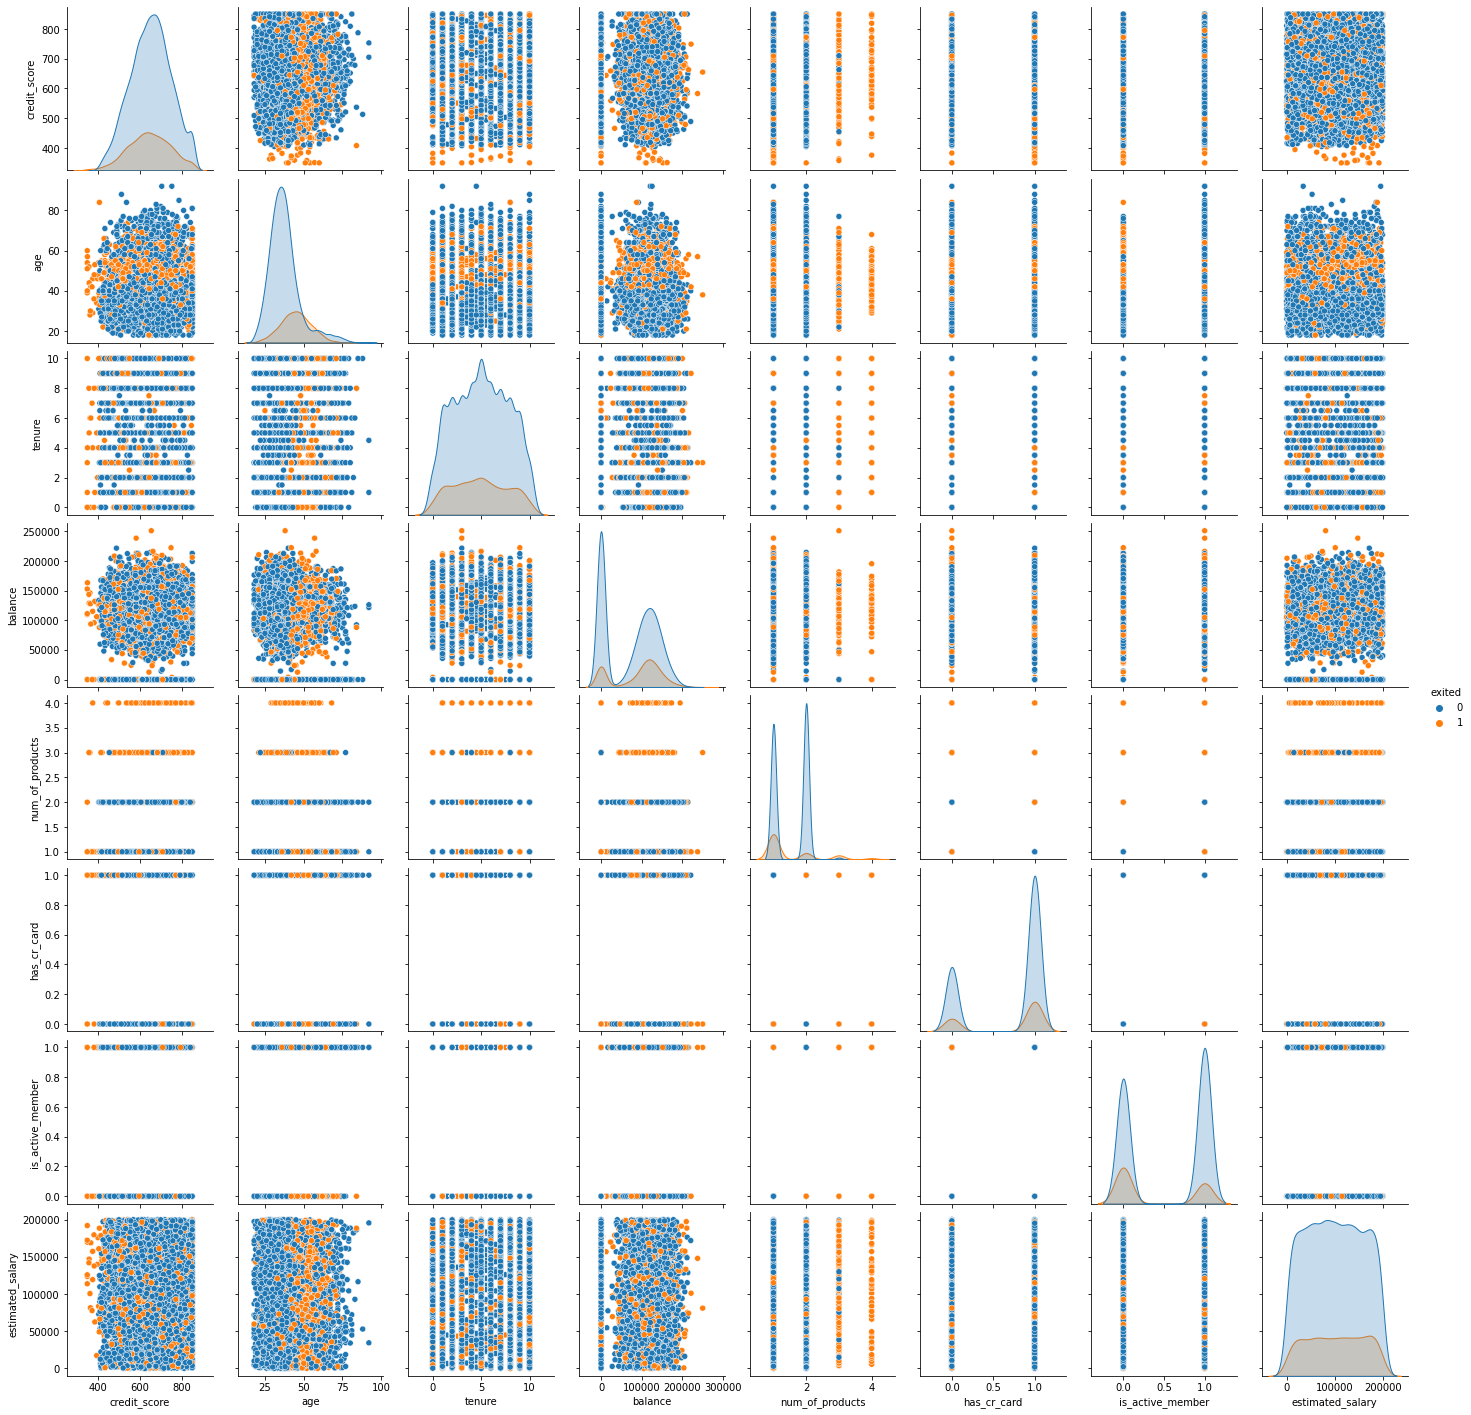

In [18]:
sns.pairplot(df, hue='exited')

## Подготовка данных

In [19]:
# извлекаю признаки и целевой признак:

features = df_ohe.drop('exited', axis=1)
target = df_ohe['exited']

In [20]:
# Разобъем данные по принципу 60/20/20 на обучающую, тестовую и валидационную :

features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size=0.60,random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size=0.50,random_state=12345)

In [21]:
# Проверим размеры выборок:

print('Размер тренериующей выборки', features_train.shape[0])
print('Размер валидационной выборки', features_valid.shape[0])
print('Размер тестовой выборки', features_test.shape[0])

Размер тренериующей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


**Масштабирую признаки, используя метод стандартизации данных**

In [22]:
# Для масштабирования зафиксируем численные признаки:

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [23]:
# Создадим объект этой структуры и настроим его на обучающих данных:

scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [24]:
# Масштабируем численные признаки обучающей, валидационной и тестовой выборках:

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.074423,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.074423,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.732596,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.351616,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.093999,1.140475,-0.891560,0,0,1.524268,1,0,0


**Вывод**

- Извлекла признаки и целевой признак.
- Разделила данные на обучающую, тестовую и валидационную выборки (60/20/20).
- Масштабировала численные признаки для трех выборок. 

Перейдем к исследованию задачи моделями машинного обучения.

## Исследование задачи

Для исследовательского обучения используем три модели:

- Логистическая регрессия
- Случайный лес
- Решающее дерево

и подберем лучшее значение f1 меры для каждой

**1.1. `Логистическая регрессия`**

In [25]:
%%time

best_f1_log = 0
best_solver = ''
best_c_values = 0
best_model_log = None

for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    for c_value in [100, 10, 1.0, 0.1, 0.01]:
        model_log_reg = LogisticRegression(random_state=12345, solver=solver, C=c_value) # инициализировали модель логистической регрессии 
        model_log_reg.fit(features_train, target_train) # обучили модель на тренировочной выборке
        predicted_valid_log = model_log_reg.predict(features_valid)
        f1_log_score = f1_score(target_valid, predicted_valid_log) # посчитали f1-меру модели на валидационной выборке
        
        if f1_log_score > best_f1_log:
            best_f1_log = f1_log_score
            best_solver = solver
            best_c_values = c_value
            best_model_log = model_log_reg

            
            
print('Лучшая модель логистической регресиии:', best_model_log)           
print('f1-мера на валидационной выборке', best_f1_log) 
print('Лучший solver:', best_solver)            
print('Лучшее значение c_values:', best_c_values)

Лучшая модель логистической регресиии: LogisticRegression(C=0.1, random_state=12345, solver='liblinear')
f1-мера на валидационной выборке 0.27272727272727276
Лучший solver: liblinear
Лучшее значение c_values: 0.1
CPU times: user 2.63 s, sys: 2.8 s, total: 5.44 s
Wall time: 5.56 s


**1.2. `Случайный лес`**

In [26]:
%%time

best_model_forest = None
best_f1_forest = 0
best_forest_depth = 0
best_forest_est = 0

for depth in range(3, 20, 1):
    for est in range(50, 80, 5):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est) 
        model_forest.fit(features_train, target_train) # обучили модель Случайного леса на тренировочной выборке
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest_score = f1_score(target_valid, predicted_valid_forest) # посчитали f1-меру модели на валидационной выборке
     
        
        if f1_forest_score > best_f1_forest:
            best_f1_forest = f1_forest_score
            best_forest_depth = depth
            best_forest_est = est
            best_model_forest = model_forest

print('Лучшая модель случайного леса', best_model_forest)           
print('f1-мера на валидационной выборке', best_f1_forest) 
print('Максимально допустимая глубина дерева:', best_forest_depth)
print('Количество деревьев наилучшей модели Случайный лес:', best_forest_est)

Лучшая модель случайного леса RandomForestClassifier(max_depth=18, n_estimators=65, random_state=12345)
f1-мера на валидационной выборке 0.555052790346908
Максимально допустимая глубина дерева: 18
Количество деревьев наилучшей модели Случайный лес: 65
CPU times: user 38 s, sys: 157 ms, total: 38.2 s
Wall time: 38.3 s


**1.3. `Решающее дерево`**

In [27]:
%%time

best_model_tree = None
best_f1_tree = 0
best_tree_depth = 0

for depth in range(1, 20, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predicted_valid_tree = model_tree.predict(features_valid)
    f1_tree_score = f1_score(target_valid, predicted_valid_tree)
    
    if f1_tree_score > best_f1_tree:
        best_f1_tree = f1_tree_score
        best_tree_depth = depth
        best_model_tree = model_tree
        
print('Лучшая модель решающего дерева', best_model_tree)            
print('f1-мера на валидационной выборке', best_f1_tree) 
print('Максимально допустимая глубина дерева:', best_tree_depth)

# обучили модель Дерева решений 
# на тренировочной выборке
# посчитали f1 меру модели на валидационной выборке

Лучшая модель решающего дерева DecisionTreeClassifier(max_depth=6, random_state=12345)
f1-мера на валидационной выборке 0.5337423312883436
Максимально допустимая глубина дерева: 6
CPU times: user 463 ms, sys: 0 ns, total: 463 ms
Wall time: 469 ms


**Вывод:** Результаты довольно низкие. Возможно precision или recall низкий и близок к 0.

**Проведем оценку метрик каждой моделей (precision_score, recall_score, accuracy_score, roc_auc_score)**

In [28]:
# оценим метрики модели Логистической регрессии:

print('Оценка точности классификации:', accuracy_score(target_valid,predicted_valid_log))
print('Полнота:', recall_score(target_valid,predicted_valid_log))
print('Точность:', precision_score(target_valid,predicted_valid_log))

probabilities_valid_log = best_model_log.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_valid_log[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_log))
fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_log)

Оценка точности классификации: 0.788
Полнота: 0.12529550827423167
Точность: 0.4953271028037383
AUC-ROC: 0.7388523860278742


In [29]:
# оценим метрики модели Случайного леса:

print('Оценка точности классификации:', accuracy_score(target_valid,predicted_valid_forest))
print('Полнота:', recall_score(target_valid,predicted_valid_forest))
print('Точность:', precision_score(target_valid,predicted_valid_forest))

probabilities_valid_forest = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_forest))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid, probabilities_one_valid_forest)

Оценка точности классификации: 0.847
Полнота: 0.4397163120567376
Точность: 0.7294117647058823
AUC-ROC: 0.8523777828746865


In [30]:
# оценим метрики модели Решающего дерева:

print('Оценка точности классификации:', accuracy_score(target_valid,predicted_valid_tree))
print('Полнота:', recall_score(target_valid,predicted_valid_tree))
print('Точность:', precision_score(target_valid,predicted_valid_tree))

probabilities_valid_tree = best_model_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_tree))
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid, probabilities_one_valid_tree)

Оценка точности классификации: 0.7855
Полнота: 0.47754137115839246
Точность: 0.4926829268292683
AUC-ROC: 0.8394526219847661


### Проведем построение ROC-кривой для кажддой модели. И выведем показатель AUC-ROC.

<Figure size 432x288 with 0 Axes>

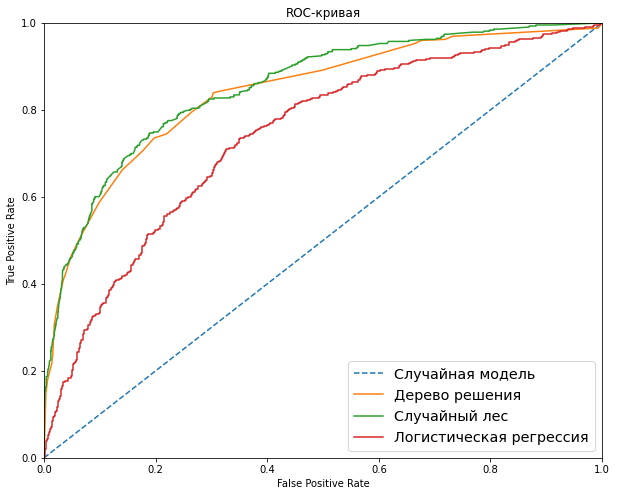

In [31]:
plt.figure()

plt.figure(figsize=(10,8))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# получим значения FPR, значения TPR и рассмотренные пороги для каждой модели:
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)

# построим кривые и сравним со случайной моделью:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения','Случайный лес','Логистическая регрессия'),
           loc='lower right', fontsize='x-large') 
plt.show()

### Вывод по несбалансированным моделям:

Показатели точности несбалансированных моделей далеки от идеала, ввиду доминирования в данных отрицательных ответов. Ни одна модель не достигла требуемого минимального порога f1-меры (0.59). В нашей задаче наблюдается сильный дисбаланс классов (англ. class imbalance), что плохо сказывается на обучении модели. Попробуем поработать на дисбалансом классов.

## Борьба с дисбалансом

### Проверка адекватности модели

0    0.7963
1    0.2037
Name: exited, dtype: float64


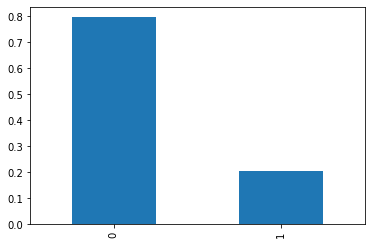

In [32]:
# проверим, как часто в целевом признаке встречается класс «1» или «0»
# и построим график для наглядности:

class_frequency = df_ohe['exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')
plt.show()

In [33]:
# проверим частоту в предсказаниях для каждой модели:

predicted_valid_tree = pd.Series(best_model_tree.predict(features_valid))
predicted_valid_forest = pd.Series(best_model_forest.predict(features_valid))
predicted_valid_log = pd.Series(best_model_log.predict(features_valid))

class_frequency_tree = predicted_valid_tree.value_counts(normalize=True)
class_frequency_forest = predicted_valid_forest.value_counts(normalize=True)
class_frequency_log = predicted_valid_log.value_counts(normalize=True)

print(class_frequency_tree)
print(class_frequency_forest)
print(class_frequency_log)

0    0.8855
1    0.1145
dtype: float64
0    0.88
1    0.12
dtype: float64
0    0.9255
1    0.0745
dtype: float64


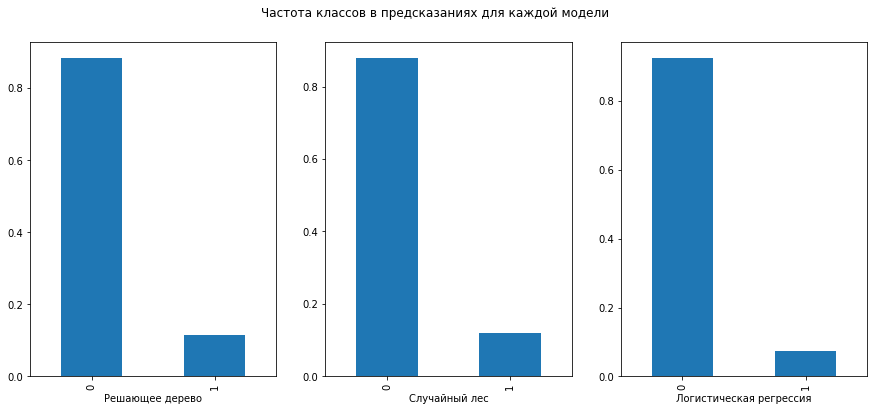

In [34]:
# визуализируем частоту предсказания для наглядности:

fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(top=0.9)
fig.suptitle('Частота классов в предсказаниях для каждой модели')

ax1 = plt.subplot(1, 3, 1)
ax1.set_xlabel('Решающее дерево')
ax1 = class_frequency_tree.plot(kind='bar')
ax2 = plt.subplot(1, 3, 2)
ax2.set_xlabel('Случайный лес')
ax2 = class_frequency_forest.plot(kind='bar')
ax3 = plt.subplot(1, 3, 3)
ax3.set_xlabel('Логистическая регрессия')
ax3 = class_frequency_log.plot(kind='bar')
plt.show()

In [35]:
# cоздадим константную модель: любому объекту она прогнозирует класс «0»
# проверим частоту ее предсказаний по обучающей и валидационной сборкамЖ

target_pred_constant_train = pd.Series([0] * len(target_train))
target_pred_constant_valid = pd.Series([0] * len(target_valid))

print(accuracy_score(target_train, target_pred_constant_train))
print(accuracy_score(target_valid, target_pred_constant_valid))

0.8006666666666666
0.7885


**Вывод**

Наблюдается **явный** *перевес в сторону отрицательных ответов*.


### 1 способ борьбы с дисбалансом: Взвешивание классов

#### Модель `логистической регресии`

In [36]:
%%time

best_f1_log_balance = 0
best_solver_balance = ''
best_c_values_balance = 0
best_model_log_balance = None

for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    for c_value in [100, 10, 1.0, 0.1, 0.01]:
        model_log_reg = LogisticRegression(random_state=12345, solver=solver, C=c_value, class_weight='balanced') # инициализировали модель логистической регрессии с параметром class_weight уравнивающим значения классов 
        model_log_reg.fit(features_train, target_train) # обучили модель на тренировочной выборке
        predicted_valid_log = model_log_reg.predict(features_valid)
        f1_log_score = f1_score(target_valid, predicted_valid_log) # посчитали f1-меру модели на валидационной выборке
        
        if f1_log_score > best_f1_log_balance:
            best_f1_log_balance = f1_log_score
            best_solver_balance = solver
            best_c_values_balance = c_value
            best_model_log_balance = model_log_reg    
            
print('Лучшая модель логистической регресиии:', best_model_log_balance)           
print('f1-мера на валидационной выборке', best_f1_log_balance) 
print('Лучший solver:', best_solver_balance)            
print('Лучшее значение c_values:', best_c_values_balance)

probabilities_valid_log_balance = best_model_log_balance.predict_proba(features_valid)
probabilities_one_valid_log_balance = probabilities_valid_log_balance[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_log_balance))
fpr_log, tpr_log, thresholds_log_balance = roc_curve(target_valid, probabilities_one_valid_log_balance)

Лучшая модель логистической регресиии: LogisticRegression(C=0.01, class_weight='balanced', random_state=12345,
                   solver='newton-cg')
f1-мера на валидационной выборке 0.48997384481255446
Лучший solver: newton-cg
Лучшее значение c_values: 0.01
AUC-ROC: 0.7458351509809301
CPU times: user 2.34 s, sys: 2.04 s, total: 4.37 s
Wall time: 4.36 s


#### Модель `случайный лес`

In [37]:
%%time

best_model_forest_balance = None
best_f1_forest_balance = 0
best_forest_depth_balance = 0
best_forest_est_balance = 0

for depth in range(3, 20, 1):
    for est in range(50, 80, 5):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced') # обучили модель случайного леса с параметром class_weight уравнивающим значения классов 
        model_forest.fit(features_train, target_train) # обучили модель Случайного леса на тренировочной выборке
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest_score = f1_score(target_valid, predicted_valid_forest) # посчитали f1-меру модели на валидационной выборке
     
        
        if f1_forest_score > best_f1_forest_balance:
            best_f1_forest_balance = f1_forest_score
            best_forest_depth_balance = depth
            best_forest_est_balance = est
            best_model_forest_balance = model_forest

print('Лучшая модель случайного леса', best_model_forest_balance)           
print('f1-мера на валидационной выборке', best_f1_forest_balance) 
print('Максимально допустимая глубина дерева:', best_forest_depth_balance)
print('Количество деревьев наилучшей модели Случайный лес:', best_forest_est_balance)

probabilities_valid_forest_balance = best_model_forest_balance.predict_proba(features_valid)
probabilities_one_valid_forest_balance = probabilities_valid_forest_balance[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_forest_balance))
fpr_forest, tpr_forest, thresholds_forest_balance = roc_curve(target_valid, probabilities_one_valid_forest_balance)

Лучшая модель случайного леса RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=50,
                       random_state=12345)
f1-мера на валидационной выборке 0.6127946127946129
Максимально допустимая глубина дерева: 9
Количество деревьев наилучшей модели Случайный лес: 50
AUC-ROC: 0.8464316392108188
CPU times: user 40.5 s, sys: 155 ms, total: 40.7 s
Wall time: 41 s


#### Модель `решающее дерево`

In [38]:
%%time

best_model_tree_balance = None
best_f1_tree_balance = 0
best_tree_depth_balance = 0

for depth in range(1, 20, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # обучили модель Дерева решений с параметром class_weight балансирующим веса классов
    model_tree.fit(features_train, target_train)
    predicted_valid_tree = model_tree.predict(features_valid)
    f1_tree_score = f1_score(target_valid, predicted_valid_tree)
    
    if f1_tree_score > best_f1_tree_balance:
        best_f1_tree_balance = f1_tree_score
        best_tree_depth_balance = depth
        best_model_tree_balance = model_tree
        
print('Лучшая модель решающего дерева', best_model_tree_balance)            
print('f1-мера на валидационной выборке', best_f1_tree_balance) 
print('Максимально допустимая глубина дерева:', best_tree_depth_balance)

probabilities_valid_tree_balance = best_model_tree_balance.predict_proba(features_valid)
probabilities_one_valid_tree_balance = probabilities_valid_tree_balance[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_tree_balance))
fpr_tree, tpr_tree, thresholds_tree_balance = roc_curve(target_valid, probabilities_one_valid_tree_balance)

# обучили модель Дерева решений 
# на тренировочной выборке
# посчитали f1 меру и AUC-ROC модели на валидационной выборке

Лучшая модель решающего дерева DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
f1-мера на валидационной выборке 0.5809128630705395
Максимально допустимая глубина дерева: 5
AUC-ROC: 0.8355347481752318
CPU times: user 474 ms, sys: 12 ms, total: 486 ms
Wall time: 491 ms


### Вывод после взвешивания классов 

Метрика f-мера выросла у случайного леса, выросла в разы у логистической регресии и немного у решающего дерева. Метрика AUC-ROC немного выросла у логистической регрессии, немного упала у остальных.

### 2 способ: Увеличение выборки (увеличения класса 1 - "положительных" ответов)

In [39]:
def upsample(features, target, repeat):
    """Функция разделяет признаки на отрицательные и положительные, увеличивает количество положительных, 
    собирает их обратно и перемешивает данные. На выходе получаем увеличенную выборку за счет положительных ответов.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#### Модель `логистической регресии`

In [40]:
%%time

best_f1_log_up = 0
best_solver_up = ''
best_c_values_up = 0
best_model_log_up = None

for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    for c_value in [100, 10, 1.0, 0.1, 0.01]:
        model_log_reg = LogisticRegression(random_state=12345, solver=solver, C=c_value) # инициализировали модель логистической регрессии
        model_log_reg.fit(features_upsampled,target_upsampled) # обучили модель на тренировочной выборке
        predicted_valid_log = model_log_reg.predict(features_valid)
        f1_log_score = f1_score(target_valid, predicted_valid_log) # посчитали f1-меру модели на валидационной выборке
        
        if f1_log_score > best_f1_log_up:
            best_f1_log_up = f1_log_score
            best_solver_up = solver
            best_c_values_up = c_value
            best_model_log_up = model_log_reg    
            
print('Лучшая модель логистической регресиии:', best_model_log_up)           
print('f1-мера на валидационной выборке', best_f1_log_up) 
print('Лучший solver:', best_solver_up)            
print('Лучшее значение c_values:', best_c_values_up)

probabilities_valid_log_up = best_model_log_up.predict_proba(features_valid)
probabilities_one_valid_log_up = probabilities_valid_log_up[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_log_up))
fpr_log, tpr_log, thresholds_log_up = roc_curve(target_valid, probabilities_one_valid_log_up)


Лучшая модель логистической регресиии: LogisticRegression(C=0.01, random_state=12345, solver='liblinear')
f1-мера на валидационной выборке 0.4885764499121265
Лучший solver: liblinear
Лучшее значение c_values: 0.01
AUC-ROC: 0.7456387700859428
CPU times: user 2.72 s, sys: 2.58 s, total: 5.3 s
Wall time: 5.25 s


#### Модель `случайный лес`

In [41]:
%%time

best_model_forest_up = None
best_f1_forest_up = 0
best_forest_depth_up = 0
best_forest_est_up = 0

for depth in range(3, 20, 1):
    for est in range(50, 80, 5):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est) # обучили модель случайного леса
        model_forest.fit(features_upsampled,target_upsampled) # обучили модель Случайного леса на тренировочной выборке
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest_score = f1_score(target_valid, predicted_valid_forest) # посчитали f1-меру модели на валидационной выборке
     
        
        if f1_forest_score > best_f1_forest_up:
            best_f1_forest_up = f1_forest_score
            best_forest_depth_up = depth
            best_forest_est_up = est
            best_model_forest_up = model_forest

print('Лучшая модель случайного леса', best_model_forest_up)           
print('f1-мера на валидационной выборке', best_f1_forest_up) 
print('Максимально допустимая глубина дерева:', best_forest_depth_up)
print('Количество деревьев наилучшей модели Случайный лес:', best_forest_est_up)

probabilities_valid_forest_up = best_model_forest_up.predict_proba(features_valid)
probabilities_one_valid_forest_up = probabilities_valid_forest_up[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_forest_up))
fpr_forest, tpr_forest, thresholds_forest_up = roc_curve(target_valid, probabilities_one_valid_forest_up)

Лучшая модель случайного леса RandomForestClassifier(max_depth=12, n_estimators=75, random_state=12345)
f1-мера на валидационной выборке 0.6184364060676779
Максимально допустимая глубина дерева: 12
Количество деревьев наилучшей модели Случайный лес: 75
AUC-ROC: 0.8515945079309397
CPU times: user 52 s, sys: 82.1 ms, total: 52.1 s
Wall time: 52.5 s


#### Модель `решающее дерево`

In [42]:
%%time

best_model_tree_up = None
best_f1_tree_up = 0
best_tree_depth_up = 0

for depth in range(1, 20, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучили модель Дерева решений
    model_tree.fit(features_upsampled,target_upsampled)
    predicted_valid_tree = model_tree.predict(features_valid)
    f1_tree_score = f1_score(target_valid, predicted_valid_tree)
    
    if f1_tree_score > best_f1_tree_up:
        best_f1_tree_up = f1_tree_score
        best_tree_depth_up = depth
        best_model_tree_up = model_tree
        
print('Лучшая модель решающего дерева', best_model_tree_up)            
print('f1-мера на валидационной выборке', best_f1_tree_up) 
print('Максимально допустимая глубина дерева:', best_tree_depth_up)

probabilities_valid_tree_up = best_model_tree_up.predict_proba(features_valid)
probabilities_one_valid_tree_up = probabilities_valid_tree_up[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_tree_up))
fpr_tree, tpr_tree, thresholds_tree_up = roc_curve(target_valid, probabilities_one_valid_tree_up)

# обучили модель Дерева решений 
# на тренировочной выборке
# посчитали f1 меру и AUC-ROC модели на валидационной выборке

Лучшая модель решающего дерева DecisionTreeClassifier(max_depth=5, random_state=12345)
f1-мера на валидационной выборке 0.5809128630705395
Максимально допустимая глубина дерева: 5
AUC-ROC: 0.8355347481752318
CPU times: user 570 ms, sys: 3.74 ms, total: 574 ms
Wall time: 584 ms


### Вывод после увеличения выборки

f-мера стала чуть лучше у случайного леса, у остальных моделей почти без изменений по сравнению с дисбалансными данными. 
Метрика AUC-ROC немного выросла у случайного леса, у остальных моделей почти без изменений по сравнению с дисбалансными данными.

### 3 способ:  Уменьшение выборки (уменьшение класса 0 - "отрицательных" ответов)

In [43]:
def downsample(features, target, fraction):
    """Функция разделяет признаки на отрицательные и положительные, уменьшает количество отрицательных, 
    собирает их обратно и перемешивает данные. На выходе получаем уменьшенную выборку за счет отрицательных ответов.
    """
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#### Модель `логистической регресии`

In [44]:
%%time

best_f1_log_down = 0
best_solver_down = ''
best_c_values_down = 0
best_model_log_down = None

for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    for c_value in [100, 10, 1.0, 0.1, 0.01]:
        model_log_reg = LogisticRegression(random_state=12345, solver=solver, C=c_value) # инициализировали модель логистической регрессии
        model_log_reg.fit(features_downsampled, target_downsampled) # обучили модель на тренировочной выборке
        predicted_valid_log = model_log_reg.predict(features_valid)
        f1_log_score = f1_score(target_valid, predicted_valid_log) # посчитали f1-меру модели на валидационной выборке
        
        if f1_log_score > best_f1_log_down:
            best_f1_log_down = f1_log_score
            best_solver_down = solver
            best_c_values_down = c_value
            best_model_log_down = model_log_reg    
            
print('Лучшая модель логистической регресиии:', best_model_log_down)           
print('f1-мера на валидационной выборке', best_f1_log_down) 
print('Лучший solver:', best_solver_down)            
print('Лучшее значение c_values:', best_c_values_down)

probabilities_valid_log_down = best_model_log_down.predict_proba(features_valid)
probabilities_one_valid_log_down = probabilities_valid_log_down[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_log_down))
fpr_log, tpr_log, thresholds_log_down = roc_curve(target_valid, probabilities_one_valid_log_down)


Лучшая модель логистической регресиии: LogisticRegression(C=0.01, random_state=12345, solver='newton-cg')
f1-мера на валидационной выборке 0.49387040280210154
Лучший solver: newton-cg
Лучшее значение c_values: 0.01
AUC-ROC: 0.7465712045644316
CPU times: user 1.6 s, sys: 1.71 s, total: 3.31 s
Wall time: 3.25 s


#### Модель `случайный лес`

In [45]:
%%time

best_model_forest_down = None
best_f1_forest_down = 0
best_forest_depth_down = 0
best_forest_est_down = 0

for depth in range(3, 20, 1):
    for est in range(50, 80, 5):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est) # обучили модель случайного леса
        model_forest.fit(features_downsampled, target_downsampled) # обучили модель Случайного леса на тренировочной выборке
        predicted_valid_forest = model_forest.predict(features_valid)
        f1_forest_score = f1_score(target_valid, predicted_valid_forest) # посчитали f1-меру модели на валидационной выборке
     
        
        if f1_forest_score > best_f1_forest_down:
            best_f1_forest_down = f1_forest_score
            best_forest_depth_down = depth
            best_forest_est_down = est
            best_model_forest_down = model_forest

print('Лучшая модель случайного леса', best_model_forest_down)           
print('f1-мера на валидационной выборке', best_f1_forest_down) 
print('Максимально допустимая глубина дерева:', best_forest_depth_down)
print('Количество деревьев наилучшей модели Случайный лес:', best_forest_est_down)

probabilities_valid_forest_down = best_model_forest_down.predict_proba(features_valid)
probabilities_one_valid_forest_down = probabilities_valid_forest_down[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_forest_down))
fpr_forest, tpr_forest, thresholds_forest_down = roc_curve(target_valid, probabilities_one_valid_forest_down)

Лучшая модель случайного леса RandomForestClassifier(max_depth=8, n_estimators=75, random_state=12345)
f1-мера на валидационной выборке 0.5895522388059701
Максимально допустимая глубина дерева: 8
Количество деревьев наилучшей модели Случайный лес: 75
AUC-ROC: 0.85220313879632
CPU times: user 20.7 s, sys: 67.9 ms, total: 20.8 s
Wall time: 20.9 s


#### Модель `решающее дерево`

In [46]:
%%time

best_model_tree_down = None
best_f1_tree_down = 0
best_tree_depth_down = 0

for depth in range(1, 20, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучили модель Дерева решений
    model_tree.fit(features_downsampled, target_downsampled)
    predicted_valid_tree = model_tree.predict(features_valid)
    f1_tree_score = f1_score(target_valid, predicted_valid_tree)
    
    if f1_tree_score > best_f1_tree_down:
        best_f1_tree_down = f1_tree_score
        best_tree_depth_down = depth
        best_model_tree_down = model_tree
        
print('Лучшая модель решающего дерева', best_model_tree_down)            
print('f1-мера на валидационной выборке', best_f1_tree_down) 
print('Максимально допустимая глубина дерева:', best_tree_depth_down)

probabilities_valid_tree_down = best_model_tree_down.predict_proba(features_valid)
probabilities_one_valid_tree_down = probabilities_valid_tree_down[:, 1]

print('AUC-ROC:', roc_auc_score(target_valid,probabilities_one_valid_tree_down))
fpr_tree, tpr_tree, thresholds_tree_down = roc_curve(target_valid, probabilities_one_valid_tree_down)

# обучили модель Дерева решений 
# на тренировочной выборке
# посчитали f1 меру и AUC-ROC модели на валидационной выборке

Лучшая модель решающего дерева DecisionTreeClassifier(max_depth=5, random_state=12345)
f1-мера на валидационной выборке 0.6074380165289257
Максимально допустимая глубина дерева: 5
AUC-ROC: 0.8371844976022043
CPU times: user 248 ms, sys: 7.91 ms, total: 256 ms
Wall time: 266 ms


### Вывод после уменьшения выборки

f-мера стала лучше у решающего дерева, чуть лучше у лог. регрессии, у модели случайный лес - уменьшилась по сравнению с увеличением выборки. 
Метрика AUC-ROC незначительно выросла у всех моделей по сравнению с увеличением выборки.

## Вывод по шагу 3

Дисбаланс повлиял на модели в худшую сторону. Лучшим методом борьбы с дисбалансом стал 2 метод - **Увеличение выборки** (увеличения класса 1 - "положительных" ответов) в тренировочной выборке. Лучшая модель - `случайный лес`:

- RandomForestClassifier (max_depth=12, n_estimators=75, random_state=12345)
- `f1-мера` на валидационной выборке `0.6184364060676779`
- Максимально допустимая глубина дерева: 12
- Количество деревьев наилучшей модели Случайный лес: 75
- `AUC-ROC`: `0.8515945079309397`
- CPU times: user 50.9 s, sys: 119 ms, total: 51 s
- Wall time: 52.1 s

### Улучшение параметров выбранной модели методом GridSearchCV

In [47]:
# создадим словарь с параметрами, которые будем перебирать
#depht_params =  {'max_depth': range(2, 20),                
                #'min_samples_leaf' : [1, 2, 3],
                #'min_weight_fraction_leaf' : np.linspace(0, 0.1, num=5),
                #'random_state': [12345]}

In [48]:
# создадим счетчик f1 меры
#f1 = make_scorer(f1_score , average='binary')

In [49]:
#best_grid_model = DecisionTreeClassifier()

In [50]:
#tree_grid = GridSearchCV(best_grid_model,depht_params,cv=5, scoring=f1,verbose=True)

In [51]:
#%%time
#tree_grid.fit(features_downsampled,target_downsampled)  # найдем наилучшие параметры на уменьшенной выборке обучаемых данных

In [52]:
#tree_grid.best_params_

In [61]:
pd.DataFrame(data=[[best_f1_tree,best_f1_tree_down,best_f1_tree_balance, best_f1_tree_up],
                   [best_f1_forest,best_f1_forest_down, best_f1_forest_balance, best_f1_forest_up]], 
             columns=['f1','f1_down','f1_balance','f1_up'],
            index=['tree','forest'])

,f1,f1_down,f1_balance,f1_up
tree,0.533742,0.607438,0.580913,0.580913
forest,0.555053,0.589552,0.612795,0.618436


## Тестирование модели

In [55]:
best_model = RandomForestClassifier(max_depth=12, n_estimators=75, random_state=12345)
best_model.fit(features_upsampled,target_upsampled)

predicted_valid_best_model = best_model.predict(features_valid)
f1_best_model = f1_score(target_valid, predicted_valid_best_model)
prediction = best_model.predict(features_test)
f1_best_test = f1_score(target_test, prediction)

print('f1-мера лучшей модели на тестовой выборке', f1_best_test)

f1-мера лучшей модели на тестовой выборке 0.6195524146054182


In [56]:
# оценим метрики лучшей модели Дерево решений на тестовой выборке:

print('Оценка точности классификации:', accuracy_score(target_test,prediction))
print('Полнота:', recall_score(target_test,prediction))
print('Точность:', precision_score(target_test,prediction))

probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('AUC-ROC:', roc_auc_score(target_test,probabilities_one_test))
fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_one_test)

Оценка точности классификации: 0.8385
Полнота: 0.6291866028708134
Точность: 0.6102088167053364
AUC-ROC: 0.8490463891022809


<Figure size 432x288 with 0 Axes>

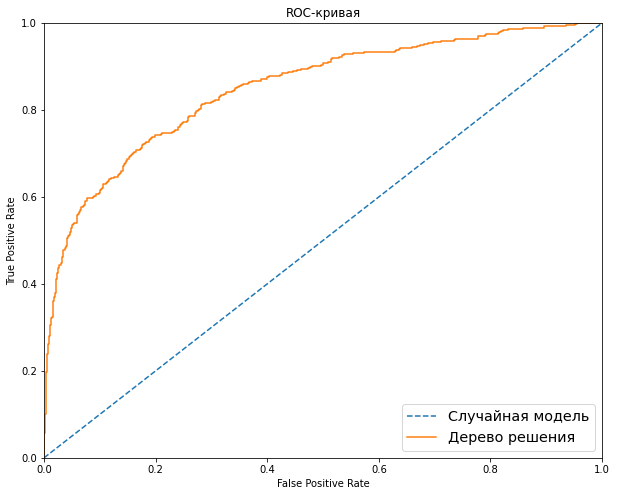

In [57]:
plt.figure()

plt.figure(figsize=(10,8))


plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# получим значения FPR, значения TPR и рассмотренные пороги для каждой модели:
plt.plot(fpr_test, tpr_test)

# построим кривую тестовой модели и сравним со случайной моделью:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Дерево решения','Случайный лес','Логистическая регрессия'),
           loc='lower right', fontsize='x-large') 
plt.show()

### Вывод

Выбранная мною модель `Случайного леса` с параметрами `max_depth`=12, `n_estimators`=75, `random_state`=12345, она превысила минимальное заданное значение f1 меры в 0,59.

Значение `f1 меры` подобранной модели на тестовой выборке - `0.6195524146054182`.

`AUC-ROC` подобранной модели на тестовой выборке - `0.8490463891022809`.

- `f1 мера` - это среднее гармоническое полноты и точности (оценивает как хорошо модели удалось прогнозирование положительного класса и не переусердствовала ли она). 

- `AUC-ROC` оценивает вероятность того, что случайно выбранный положительный объект будет будет иметь более высокую вероятность быть положительным.

AUC-ROC более устойчив к несбалансированным моделям нежели f1 мера, его показатели на первичных (несбалансированных) моделях практически не изменились, а вот показатель f1 меры увеличивался по мере устранения дисбаланса в данных.